In [ ]:
!apt-get update
!apt-get install -y gcc gfortran

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 229 kB in 1s (160 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gcc is already the newest version (4:11.2.0-1ubuntu1).
gfortran is already the newest ve

In [ ]:
!pip install numpy scipy h5py

In [ ]:
!git clone https://github.com/cconroy20/fsps.git

Cloning into 'fsps'...
remote: Enumerating objects: 3321, done.
remote: Counting objects: 100% (405/405), done.
remote: Compressing objects: 100% (286/286), done.
^C


In [ ]:
%cd fsps/src

[Errno 2] No such file or directory: 'fsps/src'
/content/fsps/src/fsps/src


In [ ]:
!ls

add_agb_dust.f90  CSP_Eliptica.png  imf_weight.o    setup_tabular_sfh.f90  sps_utils.mod
add_agb_dust.o	  CSP_Espiral.png   intsfwght.f90   setup_tabular_sfh.o    sps_utils.o
add_bs.f90	  csp_gen.f90	    intsfwght.o     sfhinfo.f90		   sps_vars.f90
add_bs.o	  csp_gen.o	    lesssimple.exe  sfhinfo.o		   sps_vars.mod
add_dust.f90	  funcint.f90	    lesssimple.f90  sfhlimit.f90	   sps_vars.o
add_dust.o	  funcint.o	    lesssimple.o    sfhlimit.o		   SSP_evol_time.png
add_nebular.f90   getindx.f90	    linterparr.f90  sfhstat.f90		   ssp_gen.f90
add_nebular.o	  getindx.o	    linterparr.o    sfhstat.o		   ssp_gen.o
add_remnants.f90  get_lumdist.f90   linterp.f90     sfh_weight.f90	   Starburst_dustype2.png
add_remnants.o	  get_lumdist.o     linterp.o	    sfh_weight.o	   Starburst_dustype4.png
add_xrb.f90	  getmags.f90	    locate.f90	    simple.exe		   tsum.f90
add_xrb.o	  getmags.o	    locate.o	    simple.f90		   tsum.o
agn_dust.f90	  getspec.f90	    Makefile	    simple.o		   vacairconv.f90
ag

In [ ]:
!make

gfortran -O3 -cpp -fPIC   -o simple.exe simple.o sps_vars.o sps_utils.o compsp.o csp_gen.o ssp_gen.o getmags.o locate.o funcint.o sps_setup.o pz_convol.o get_tuniv.o intsfwght.o imf.o imf_weight.o add_dust.o getspec.o sbf.o add_bs.o mod_hb.o add_remnants.o getindx.o smoothspec.o mod_gb.o add_nebular.o add_xrb.o write_isochrone.o sfhstat.o linterp.o tsum.o add_agb_dust.o linterparr.o ztinterp.o vacairconv.o igm_absorb.o get_lumdist.o attn_curve.o sfh_weight.o sfhlimit.o sfhinfo.o setup_tabular_sfh.o agn_dust.o
gfortran -O3 -cpp -fPIC   -o lesssimple.exe lesssimple.o sps_vars.o sps_utils.o compsp.o csp_gen.o ssp_gen.o getmags.o locate.o funcint.o sps_setup.o pz_convol.o get_tuniv.o intsfwght.o imf.o imf_weight.o add_dust.o getspec.o sbf.o add_bs.o mod_hb.o add_remnants.o getindx.o smoothspec.o mod_gb.o add_nebular.o add_xrb.o write_isochrone.o sfhstat.o linterp.o tsum.o add_agb_dust.o linterparr.o ztinterp.o vacairconv.o igm_absorb.o get_lumdist.o attn_curve.o sfh_weight.o sfhlimit.o sfh

In [ ]:
import os
os.environ['SPS_HOME'] = '/content/fsps'

In [ ]:
!pip install git+https://github.com/dfm/python-fsps

  Cloning https://github.com/dfm/python-fsps to /tmp/pip-req-build-m7m0vo_h
  Running command git clone --filter=blob:none --quiet https://github.com/dfm/python-fsps /tmp/pip-req-build-m7m0vo_h
  Resolved https://github.com/dfm/python-fsps to commit 738f3e63898dfc090dee4122a9ac3e0e3d137c72
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import os
print(os.getcwd())

/content/fsps/src/fsps/src


In [ ]:
import fsps
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [ ]:
sp = fsps.StellarPopulation(zcontinuous=1)
sp.params["imf_type"] = 0 # Salpeter IMF (0)
sp.params["sfh"] = 0  # Tau model SFH (1)

In [ ]:
grid_ages = np.linspace(0.01, 13.7, 5)
print(grid_ages)

[1.00000e-02 3.43250e+00 6.85500e+00 1.02775e+01 1.37000e+01]


In [ ]:
sp.libraries #mist isocronas, librería espectral miles y modelo de polvo dustem

(b'mist', b'miles', b'DL07  ')

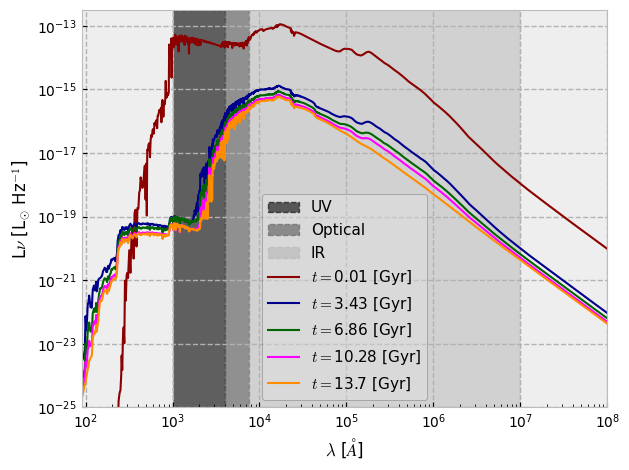

In [ ]:
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
fig = plt.figure(figsize=[6.4,4.8]) # create the canvas for plotting
ax = plt.subplot()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(90, 10**8)
ax.set_ylim(10**-25, 10**-12.5)
ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel(r'L${\nu}$ [L$_{\odot}$ Hz$^{-1}$]')
plt.grid(lw = 1)
ax.axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax.axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax.axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

for t,i in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = i)
    ax.plot(wave, spec, lw = 1.5, alpha = 1, color = colors[t], label = r'$t = $'+str(round(i,2))+' [Gyr]')
    #plt.tight_layout()
plt.legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))
plt.tight_layout()
plt.savefig('SSP_evol_time.png', dpi = 600)
plt.show()

## ESPIRAL

In [ ]:
sp = fsps.StellarPopulation(zcontinuous=1)
sp.params["imf_type"] = 2 # Salpeter IMF (0)
sp.params["sfh"] = 1  # Tau model SFH (1)
sp.params["dust_type"] = 2
sp.params["logzsol"] = 0
sp.params["dust2"] = 0.2
sp.params["tau"] = 3

In [ ]:
grid_ages = np.linspace(0.01, 13.7, 5)
print(grid_ages)

[1.00000e-02 3.43250e+00 6.85500e+00 1.02775e+01 1.37000e+01]


In [ ]:
sp.libraries #mist isocronas, librería espectral miles y modelo de polvo dustem

(b'mist', b'miles', b'DL07  ')

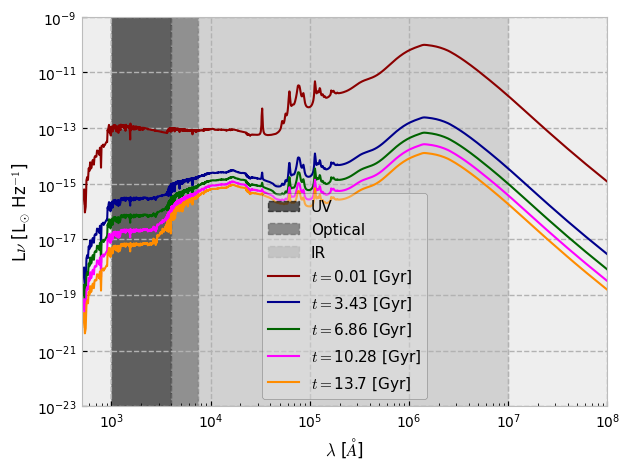

In [ ]:
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
fig = plt.figure(figsize=[6.4,4.8]) # create the canvas for plotting
ax = plt.subplot()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(500, 10**8)
ax.set_ylim(10**-23, 10**-9)
ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel(r'L${\nu}$ [L$_{\odot}$ Hz$^{-1}$]')
plt.grid(lw = 1)
ax.axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax.axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax.axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

for t,i in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = i)
    ax.plot(wave, spec, lw = 1.5, alpha = 1, color = colors[t], label = r'$t = $'+str(round(i,2))+' [Gyr]')
    #plt.tight_layout()
plt.legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))
plt.tight_layout()
plt.savefig('CSP_Espiral.png', dpi = 600)
plt.show()

## ELIPTICA

In [ ]:
sp = fsps.StellarPopulation(zcontinuous=1)
sp.params["imf_type"] = 2
sp.params["sfh"] = 1
sp.params["tau"] = 0.5
sp.params["dust_type"] = 2
sp.params["logzsol"] = 0.5
sp.params["tburst"] = 13
sp.params["dust2"] = 0.0001

In [ ]:
grid_ages = np.linspace(0.01, 13.7, 5)
print(grid_ages)

[1.00000e-02 3.43250e+00 6.85500e+00 1.02775e+01 1.37000e+01]


In [ ]:
sp.libraries #mist isocronas, librería espectral miles y modelo de polvo dustem

(b'mist', b'miles', b'DL07  ')

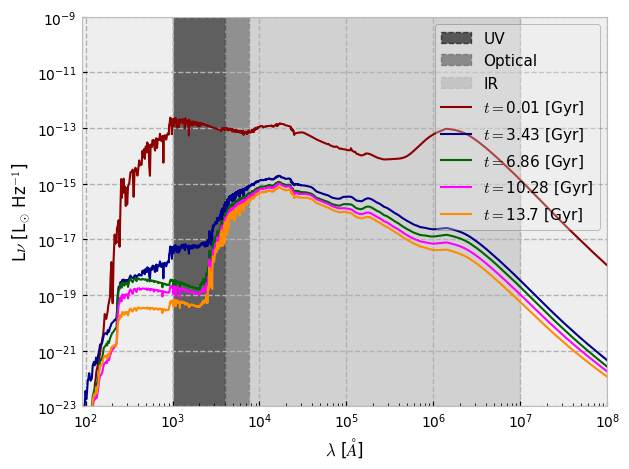

In [ ]:
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
fig = plt.figure(figsize=[6.4,4.8]) # create the canvas for plotting
ax = plt.subplot()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(90, 10**8)
ax.set_ylim(10**-23, 10**-9)
ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel(r'L${\nu}$ [L$_{\odot}$ Hz$^{-1}$]')
plt.grid(lw = 1)
ax.axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax.axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax.axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

for t,i in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = i)
    ax.plot(wave, spec, lw = 1.5, alpha = 1, color = colors[t], label = r'$t = $'+str(round(i,2))+' [Gyr]')
    #plt.tight_layout()

plt.legend(fontsize = 11, framealpha = 0.3, loc = 'best', edgecolor = (0,0,0,1))
plt.tight_layout()
plt.savefig('CSP_Eliptica.png', dpi = 600)
plt.show()

## STARBURST DUSTYPE = 2

In [ ]:
sp = fsps.StellarPopulation(zcontinuous=1)
sp.params["imf_type"] = 2
sp.params["sfh"] = 1
sp.params["tau"] = 5
sp.params["dust_type"] = 2
sp.params["logzsol"] = -1
sp.params["dust2"] = 1.2
sp.params["const"] = 0.8

In [ ]:
grid_ages = np.linspace(0.01, 13.7, 5)
print(grid_ages)

[1.00000e-02 3.43250e+00 6.85500e+00 1.02775e+01 1.37000e+01]


In [ ]:
sp.libraries #mist isocronas, librería espectral miles y modelo de polvo dustem

(b'mist', b'miles', b'DL07  ')

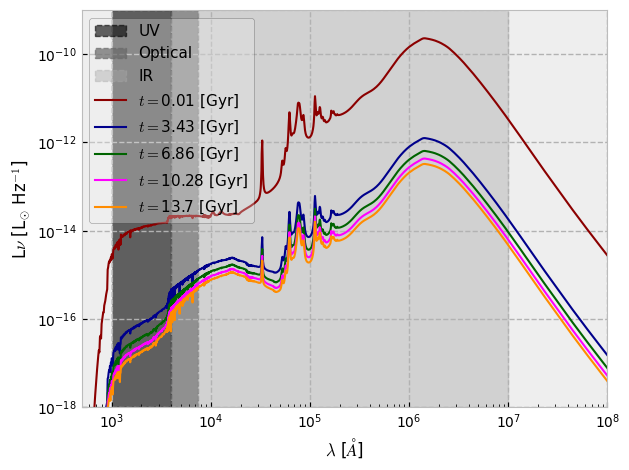

In [ ]:
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
fig = plt.figure(figsize=[6.4,4.8]) # create the canvas for plotting
ax = plt.subplot()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(500, 10**8)
ax.set_ylim(10**-18, 10**-9)
ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel(r'L${\nu}$ [L$_{\odot}$ Hz$^{-1}$]')
plt.grid(lw = 1)
ax.axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax.axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax.axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

for t,i in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = i)
    ax.plot(wave, spec, lw = 1.5, alpha = 1, color = colors[t], label = r'$t = $'+str(round(i,2))+' [Gyr]')
    #plt.tight_layout()
    #plt.savefig('Images/im1.jpg', dpi = 600)
plt.legend(fontsize = 11, framealpha = 0.3, loc = 'upper left', edgecolor = (0,0,0,1))
plt.tight_layout()
plt.savefig('Starburst_dustype2.png', dpi = 600)
plt.show()

## STARBURST DUSTYPE = 4

In [ ]:
sp = fsps.StellarPopulation(zcontinuous=1)
sp.params["imf_type"] = 2
sp.params["sfh"] = 1
sp.params["tau"] = 5
sp.params["dust_type"] = 4
sp.params["logzsol"] = -1
sp.params["dust1"] = 0.3
sp.params["dust2"] = 1.2
sp.params["const"] = 0.8

In [ ]:
grid_ages = np.linspace(0.01, 13.7, 5)
print(grid_ages)

[1.00000e-02 3.43250e+00 6.85500e+00 1.02775e+01 1.37000e+01]


In [ ]:
sp.libraries #mist isocronas, librería espectral miles y modelo de polvo dustem

(b'mist', b'miles', b'DL07  ')

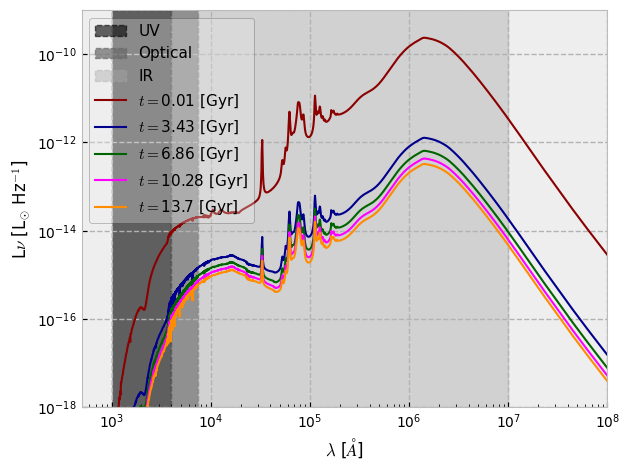

In [ ]:
colors = ['darkred', 'darkblue', 'darkgreen', 'magenta', 'darkorange']
fig = plt.figure(figsize=[6.4,4.8]) # create the canvas for plotting
ax = plt.subplot()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(500, 10**8)
ax.set_ylim(10**-18, 10**-9)
ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel(r'L${\nu}$ [L$_{\odot}$ Hz$^{-1}$]')
plt.grid(lw = 1)
ax.axvspan(1000, 4000, color='black', alpha=0.6, ls=  '--', lw = 1, label = r'UV')
ax.axvspan(4000, 7500, color='dimgray', alpha=0.7, ls=  '--', lw = 1, label = r'Optical')
ax.axvspan(7500, 10**7, color='darkgray', alpha=0.42, ls=  '--',  lw = 1, label = r'IR')

for t,i in enumerate(grid_ages):
    wave, spec = sp.get_spectrum(tage = i)
    ax.plot(wave, spec, lw = 1.5, alpha = 1, color = colors[t], label = r'$t = $'+str(round(i,2))+' [Gyr]')
    #plt.tight_layout()
    #plt.savefig('Images/im1.jpg', dpi = 600)
plt.legend(fontsize = 11, framealpha = 0.3, loc = 'upper left', edgecolor = (0,0,0,1))
plt.tight_layout()
plt.savefig('Starburst_dustype4.png', dpi = 600)
plt.show()